In [1]:
import requests
url = 'https://raw.githubusercontent.com/yigitatesh/ml/main/plots.py'
r = requests.get(url)

with open('plots.py', 'w') as f:
    f.write(r.text)

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import mode

from plots import knn_classifier_plot

from sklearn.datasets import make_classification

# Create Data

In [3]:
# classification 1
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=3)

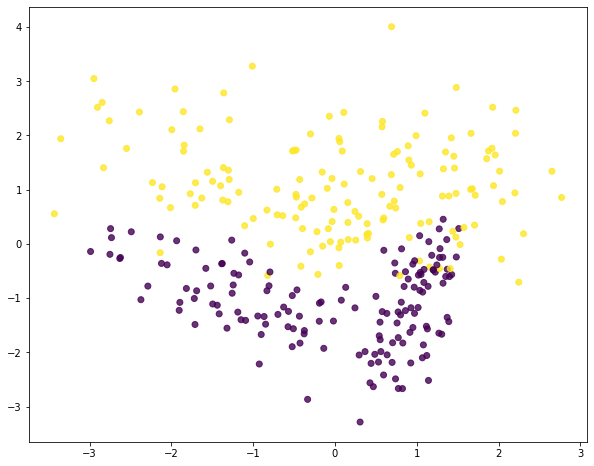

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

## K-Nearest Neighbour Classifier

In [7]:
# KNNClassifier class



In [8]:
knn = KNNClassifier(n_neighbors=3).fit(X, y)

In [9]:
knn.score(X, y)

0.95

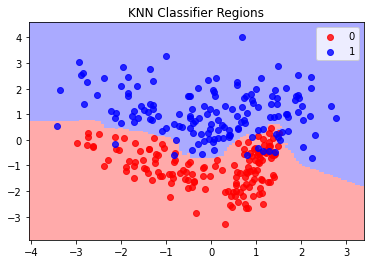

In [10]:
knn_classifier_plot(knn, X, y, labels=[0, 1])

## Comparison of K values

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

k: 1, train score: 1.0, test score: 0.9333333333333333


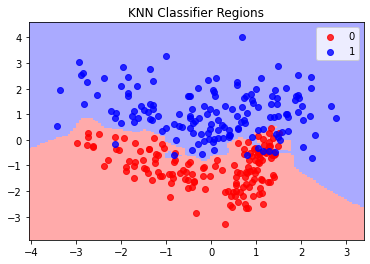

k: 3, train score: 0.96, test score: 0.9333333333333333


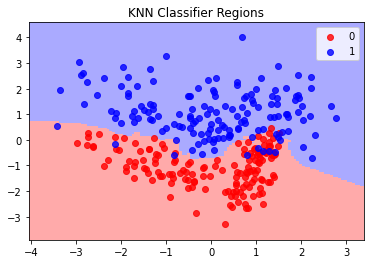

k: 5, train score: 0.96, test score: 0.9333333333333333


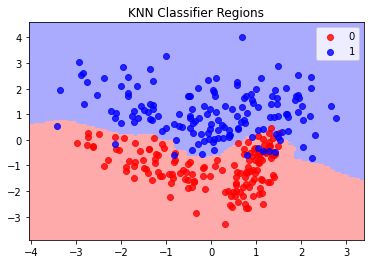

k: 7, train score: 0.9555555555555556, test score: 0.9333333333333333


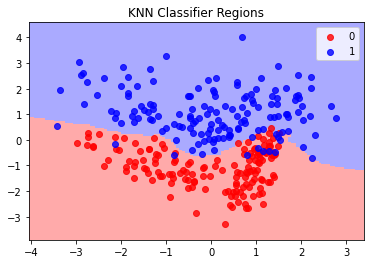

k: 9, train score: 0.9511111111111111, test score: 0.9333333333333333


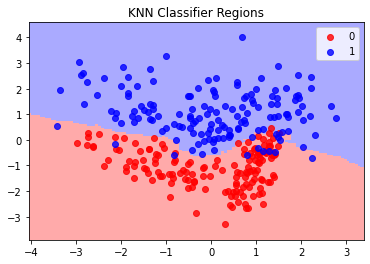

k: 11, train score: 0.9466666666666667, test score: 0.9333333333333333


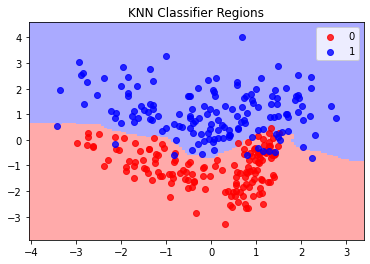

k: 13, train score: 0.9511111111111111, test score: 0.9333333333333333


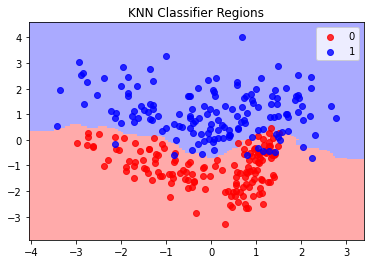

k: 15, train score: 0.9422222222222222, test score: 0.9466666666666667


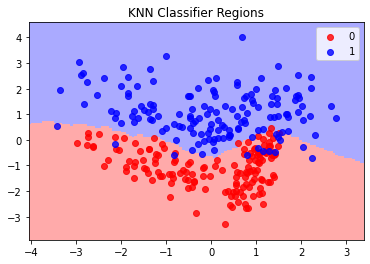

In [15]:
# compare k values
k_values = list(range(1, 16, 2))
train_scores, test_scores = [], []
# loop for k values
for k in k_values:
    knn = KNNClassifier(n_neighbors=k).fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    print("k: {}, train score: {}, test score: {}".format(k, train_score, test_score))
    train_scores.append(train_score)
    test_scores.append(test_score)
    knn_classifier_plot(knn, X, y, labels=[0, 1])

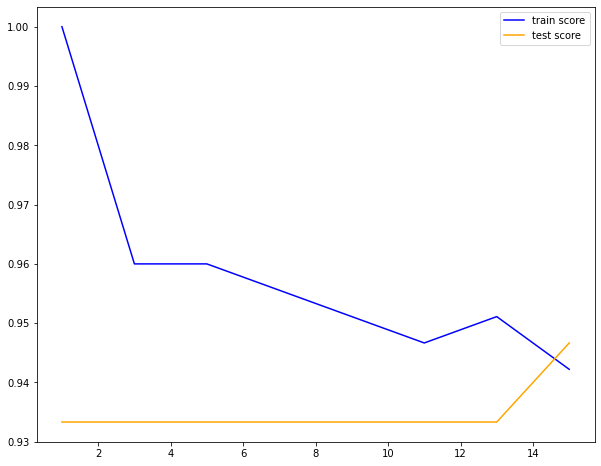

In [16]:
# plot scores
plt.figure(figsize=(10, 8))
plt.plot(k_values, train_scores, color="blue", label="train score")
plt.plot(k_values, test_scores, color="orange", label="test score")
plt.legend()

# KNN Regressor

In [5]:
# KNNRegressor class



## Load Regression Data

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/cars_updated.csv")
df.head(3)

,height,length,width,driveline,engine,gears,transmission,cty,fuel_type,hwy,id,make,model_year,year,hp,torque,model,km_per_l_cty,km_per_l_hwy
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,6,Automatic,18,Gasoline,25,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236,Audi A3,6.343612,8.810573
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,Automatic,22,Gasoline,28,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207,Audi A3,7.753304,9.867841
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,Manual,21,Gasoline,30,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207,Audi A3,7.400881,10.572687


In [7]:
X = df["hp"].values.reshape(-1, 1)
y = df["torque"].values

In [8]:
knn_reg = KNNRegressor(3).fit(X, y)

In [9]:
knn_reg.score(X, y)

0.9257911190104341

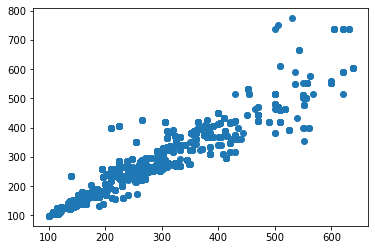

In [10]:
plt.figure()
plt.scatter(X, y)

In [13]:
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [2]:
# compare k values
k_values = list(range(1, 16, 2))
train_scores, test_scores = [], []
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(18, 7))
ax = ax.ravel()

# loop for k values
for i in range(len(k_values)):
    # fit class and evaluate it
    k = k_values[i]
    knn = KNNRegressor(n_neighbors=k).fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # visualize results
    ax[i].set_title("k: {}\ntrain score: {}\ntest score: {}".format(k, train_score, test_score))
    ax[i].scatter(X, y, color="blue")
    interval = np.arange(100, 650, 1)
    preds = knn.predict(interval.reshape(-1, 1))
    ax[i].plot(interval, preds, color="red")
    
# adjust spaces between plots
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)

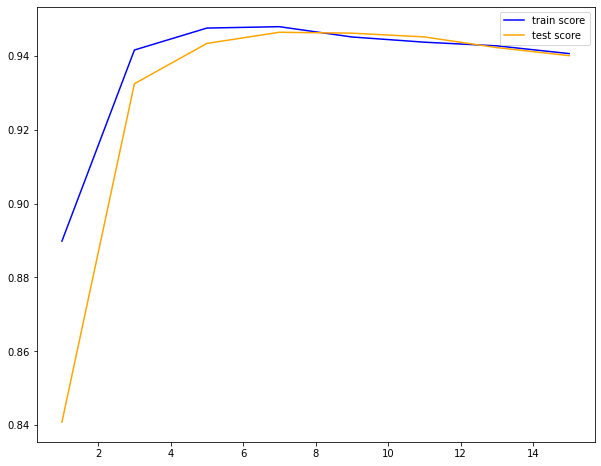

In [17]:
# plot scores
plt.figure(figsize=(10, 8))
plt.plot(k_values, train_scores, color="blue", label="train score")
plt.plot(k_values, test_scores, color="orange", label="test score")
plt.legend()

# Create Data for Clustering

In [5]:
from sklearn.datasets import make_blobs

In [85]:
# create data
X, y = make_blobs(n_samples=400, n_features=2, centers=3, random_state=100)

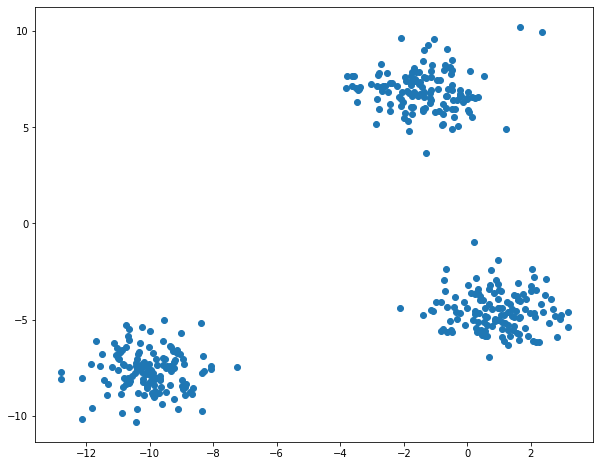

In [86]:
# plot data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1])

# K Means Clustering

Steps for K-Means Clustering: <br>
1) Select K random points as cluster centers called centroids. <br>
Repeat until convergence: <br>
2) Assign each data point to the closest cluster with respect to each centroid. <br>
3) Shift cluster centroids to center of their clusters. <br>

In [87]:
# KMeans Clustering class



In [88]:
# fit kmeans
kmeans = KMeans(n_clusters=3).fit(X)

In [1]:
# predict and visualize
preds = kmeans.predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=preds)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            color="red", s=100)

## KMeans Plot

In [90]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def _init_random_centroids(self, X):
        centroids = []
        # random indexes
        indexes = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        for index in indexes:
            centroid = X[index]
            centroids.append(centroid)
        return np.array(centroids)

    def _calculate_labels(self, X, y, centroids):
        for i, row in enumerate(X):
            # calculate distances
            distances = ((centroids - row) ** 2).sum(axis=1) ** 0.5
            centroid_index = distances.argmin()
            y[i] = centroid_index
        return y

    def _update_centroids(self, X, y, centroids):
        # update each centroid to it's cluster's middle point
        for i in range(len(self.centroids)):
            cluster_indexes = y == i
            mean_point = X[cluster_indexes, :].mean(axis=0)
            self.centroids[i] = mean_point
        return self.centroids

    def fit(self, X):
        n_samples, n_features = X.shape
        y = np.zeros(X.shape[0])
        
        # initialize random centroids
        self.centroids = self._init_random_centroids(X)
        
        fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 7))
        ax = ax.ravel()
        
        # loop until convergence
        for i in range(self.max_iter):
            # calculate labels for each data point by finding the closest centroid
            y = self._calculate_labels(X, y, self.centroids)
            
            # visualize
            if i < 8:
                ax[i].set_title("iteration: {}".format(i))
                ax[i].scatter(X[:, 0], X[:, 1], c=y)
                ax[i].scatter(self.centroids[:, 0], self.centroids[:, 1],
                          color="red", s=100)

            # update centroids
            self.centroids = self._update_centroids(X, y, self.centroids)
    
        plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
    
        return self

    def predict(self, X):
        y = np.zeros(X.shape[0])
        y = self._calculate_labels(X, y, self.centroids)
        return y

In [3]:
# fit kmeans
kmeans = KMeans(n_clusters=3).fit(X)

# Movie Recommendation

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

## Load Movies Data

In [1]:
url = "https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/imdb_movies.csv"

df = pd.read_csv(url)
df.head()

## Data Exploration

## Prepare to Machine Learning

In [104]:
# X and y data
X = df.drop("Title", axis=1)
y = df["Title"]

In [4]:
# One hot encoding of Genres
genres_df = df["Genres"].str.replace(",", "|").str.get_dummies()
genres_df.head()

In [106]:
# Combine X and Genres
X = pd.concat([X, genres_df], axis=1).drop("Genres", axis=1)
X.head()

,Rating,NumVotes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,8.1,57783,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,8.3,114417,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7.9,89238,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,53428,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,8.2,101862,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# scaling columns
scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,Rating,NumVotes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.675676,0.003360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.729730,0.027887,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.621622,0.016982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.648649,0.001474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.702703,0.022449,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# fit KNN model
knn = KNeighborsClassifier().fit(X_scaled.values, y.values)

In [114]:
# recommend for a movie
movie_name = "Kung Fu Panda"
n_movies = 10
index = y[y == movie_name].index[0]
data = X_scaled.iloc[index, :].values.reshape(1, -1)
indexes = knn.kneighbors(data, n_neighbors=n_movies)[1].ravel()

for movie in y.iloc[indexes].values:
    print(movie)

Kung Fu Panda
The Lego Movie
Incredibles 2
Big Hero 6
How to Train Your Dragon 2
The Adventures of Tintin
Kung Fu Panda 2
Rise of the Guardians
How to Train Your Dragon: The Hidden World
Kubo and the Two Strings
